# C1 - Introduction to Human and Computer Vision
## Week 4

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np

# Get project's root directory
BASE_PATH = os.path.join(re.search(r'.+(Team5)', os.getcwd())[0], 'week4')
os.chdir(BASE_PATH)
BASE_PATH

DATA_DIRECTORY = '../data'

In [25]:
# Read pickel file to see detailed info of the images augmentation
with open(f'{DATA_DIRECTORY}/qsd1_w4/augmentations.pkl', 'rb') as f:
    augmentations_info = pickle.load(f)

## Task 1

### a) Remove background, detect noise (and filter it)

In [58]:
from src.background_removal import background_removal
from src.noise_removal import denoise_image
from tqdm import tqdm

# Image names
QSD1_w4_names = [f for f in os.listdir(f'{DATA_DIRECTORY}/qsd1_w4/') if f.endswith('.jpg')]
QSD1_w4_names.sort()

# Initialize datasets
QSD1_w4 = []
QSD1_w4_filtered = []
QSD1_w4_nonAugmented = []

# Load datasets (+ filter)
for image_name in tqdm(QSD1_w4_names):
    # Read QSD1_w4
    image_bgr = cv2.imread(f'{DATA_DIRECTORY}/qsd1_w4/{image_name}')
    image_qsd1 = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    QSD1_w4.append(image_qsd1)

    # Read non-augmented image
    image_bgr = cv2.imread(f'{DATA_DIRECTORY}/qsd1_w4/non_augmented/{image_name}')
    image_nonAugmented = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    image_nonAug_bckg_remov = background_removal(image_nonAugmented)  # Remove background in non-augmented image
   
    QSD1_w4_nonAugmented.append(image_nonAug_bckg_remov)

    # Filter image from QSD1_w4
    filtered_image = background_removal(denoise_image(image_qsd1))  # Detect noise (and clean it) + Remove background

    QSD1_w4_filtered.append(filtered_image)

100%|██████████| 30/30 [01:22<00:00,  2.76s/it]


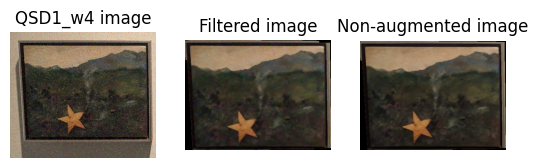

In [60]:
# See some examples
img_number = 3


fig, axes = plt.subplots(1, 3)  # 1 fila, 3 columnas

# QSD1_w4 image
axes[0].imshow(QSD1_w4[img_number])
axes[0].set_title('QSD1_w4 image')
axes[0].axis('Off')

# Filtered image (background removal + denoise)
axes[1].imshow(QSD1_w4_filtered[img_number][0])
axes[1].set_title('Filtered image')
axes[1].axis('Off')

# Non-augmented image
axes[2].imshow(QSD1_w4_nonAugmented[img_number][0])  # Rotar 90 grados
axes[2].set_title('Non-augmented image')
axes[2].axis('Off')

plt.show()

### b) Detect keypoints

### c) Compute descriptors in Museum and query images

# Task 2

### a) Find tentative matches based on similarity of local appearance and verify matches 

### b) Implement a system to discard queries not in the data set (unknowns)

# Task 3

### a) Evaluate system based on keypoint descriptors on QSD1-W4

### b) Compare your best query system from previous week on QSD1-W4

# Task 4

### a) Create pkl file